In [1]:
#checking directory
import os
os.getcwd()

'C:\\Users\\Jaspreet'

In [2]:
#Loading our dataset using pandas
os.chdir('D:/')
import pandas as pd
df=pd.read_csv('bank-additional-full.csv', delimiter=';')

LOOKING OR EXAMINING DATA

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#for seeing all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


CHECKING FOR NULL VALUES

In [6]:
#checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

VISULIZING OUR DATA

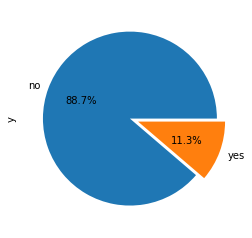

In [14]:
#AS our Target variable y consist of two classes Yes or No,we are just seeing the percentage of each class
import seaborn as sns
df['y'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%")

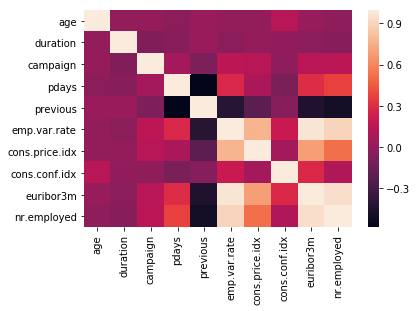

In [8]:
#Checking the correlation of each feature data
sns.heatmap(df.corr())

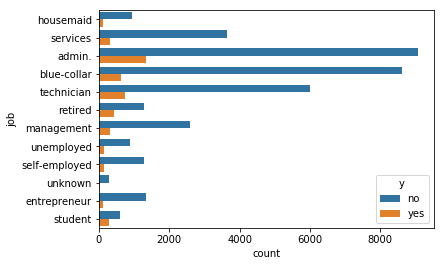

In [9]:
sns.countplot(y="job",hue='y', data=df)

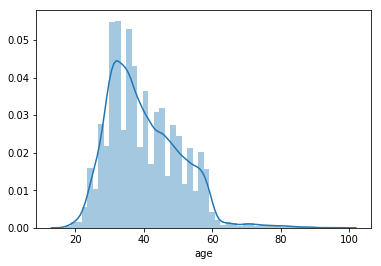

In [10]:
#Using Distribution plot for age column for some info
sns.distplot(df['age'])

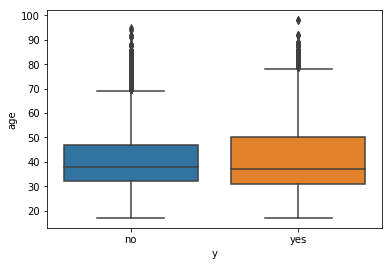

In [11]:
sns.boxplot(x=df['y'],y=df['age'])

AS we saw from above plots people from age 30 to 52 are subscribing or some are not subscribing a term account

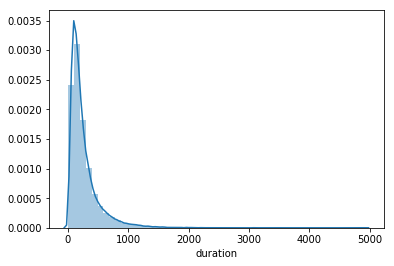

In [12]:
sns.distplot(df['duration'])

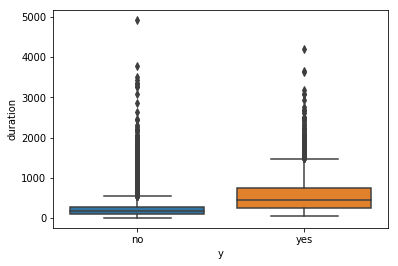

In [13]:
sns.boxplot(x=df['y'],y=df['duration'])

Duration is seeing a main feature here to which our target feature is more effected
as from the box plot you can see the median of the both boxplot are on different range so this feature helps us for our model performance

In [15]:
#before dropping duplicates
df.shape

(41188, 21)

In [16]:
#After dropping duplicates
df=df.drop_duplicates()
df.shape

(41176, 21)

In [17]:
#Creating dummy variables for our categirical features in data sets so that we can model our data
df1=df

In [18]:
df1=pd.get_dummies(df1,columns=['job','marital','education','default','housing','loan','poutcome','y'],drop_first=True)

In [19]:
df1.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success,y_yes
0,56,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,57,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,37,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,40,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,56,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [20]:
df1.drop(['contact','month','day_of_week'],axis=1,inplace=True)

Preprocessing and Scaling

In [21]:
df1.head()
X=df1.drop(['y_yes'],axis=1,inplace=False)
Y=df1['y_yes']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=4)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
scaler.fit(X_train)
# same result, but more efficient computation
X_train_scaled = scaler.fit_transform(X_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
X_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [25]:
a=X_train.columns

In [26]:
X_train_n=pd.DataFrame(X_train_scaled,columns=a)

In [27]:
b=X_test.columns
X_test_n=pd.DataFrame(X_test_scaled,columns=b)

Modeling oF Scaled DATA

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
logreg = LogisticRegression(C=1).fit(X_train_n, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
y_pred_test=logreg.predict(X_test_n)

In [31]:
print("test accuracy :" ,accuracy_score(y_test,y_pred_test))

test accuracy : 0.9106289970047762


In [32]:
y_pred_train=logreg.predict(X_train_n)

In [33]:
print("train accuracy :" ,accuracy_score(y_train,y_pred_train))

train accuracy : 0.9094473163792804


Try Another Model FOR Classification

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=59, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=59, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [35]:
y_pred_train_forest=forest.predict(X_train)

In [36]:
print("train accuracy :" ,accuracy_score(y_train,y_pred_train_forest))

train accuracy : 0.999826527426014


In [37]:
y_pred_test_forest=forest.predict(X_test)

In [38]:
print("test accuracy :" ,accuracy_score(y_test,y_pred_test_forest))

test accuracy : 0.9127337488869101


Parameter Tuning In Logestic Regression As we choose Logistic Regression as our Model here because Random Forest 
overfitting our model

In [125]:
C_range=range(1,100)
C_acc=[]
for C1 in C_range:
    logreg = LogisticRegression(C=C1)
    logreg.fit(X_train_n, y_train)
    y_pred=logreg.predict(X_test_n)
    accu=accuracy_score(y_test,y_pred)
    C_acc.append(accu)
print(C_acc)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.9106289970047762, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428, 0.9104670930138428,

Text(0, 0.5, 'logreg Accuracy')

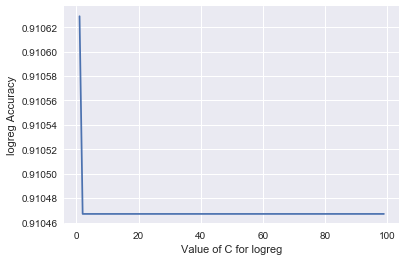

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(C_range,C_acc)
plt.xlabel("Value of C for logreg")
plt.ylabel("logreg Accuracy")

In [178]:
N_range=range(1,100)
N_acc=[]
for N in N_range:
    forest12 = RandomForestClassifier(n_estimators=N, random_state=2)
    forest12.fit(X_train, y_train)
    y_pred_test_forest12=forest12.predict(X_test)
    accu=accuracy_score(y_test,y_pred_test_forest12)
    N_acc.append(accu)
print(N_acc)  

[0.8871529183194365, 0.8997004776167733, 0.8988909576621064, 0.9028576054399741, 0.9048814053266413, 0.9051242613130414, 0.9051242613130414, 0.9054480692949081, 0.9082813891362422, 0.9072290131951752, 0.909900429045576, 0.9082004371407755, 0.9092528130818425, 0.9109528049866429, 0.9094956690682425, 0.9109528049866429, 0.9098194770501092, 0.9108718529911762, 0.9111147089775763, 0.9107099490002428, 0.9103051890229095, 0.909900429045576, 0.9107909009957096, 0.9111956609730429, 0.9115194689549098, 0.9116004209503764, 0.9111956609730429, 0.9106289970047762, 0.9115194689549098, 0.9107909009957096, 0.9111956609730429, 0.9103861410183761, 0.9103861410183761, 0.9112766129685097, 0.9104670930138428, 0.9107909009957096, 0.9108718529911762, 0.9109528049866429, 0.9117623249413098, 0.9124099409050433, 0.9120861329231765, 0.9118432769367765, 0.9121670849186433, 0.9116004209503764, 0.9117623249413098, 0.9111956609730429, 0.9120051809277099, 0.9121670849186433, 0.9120051809277099, 0.9122480369141099, 0

Text(0, 0.5, 'logreg Accuracy')

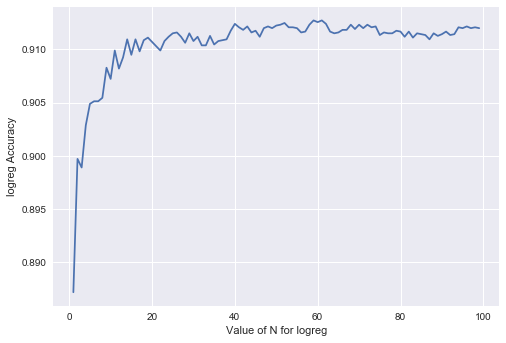

In [200]:
plt.plot(N_range,N_acc)
plt.xlabel("Value of N for logreg")
plt.ylabel("logreg Accuracy")

MODEL EVALUTION USING AUC-ROC CURVE

In [39]:
from sklearn.metrics import roc_curve
fp,tp,th=roc_curve(y_test,y_pred_test)
fp1,tp1,th1=roc_curve(y_test,y_pred_test_forest)

In [40]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("saperation of two classes",auc_score)

saperation of two classes 0.6922275842000098


In [41]:
auc_score=roc_auc_score(y_test,y_pred_test_forest)
print("saperation of two classes for Forest",auc_score)

saperation of two classes for Forest 0.7378998394647182


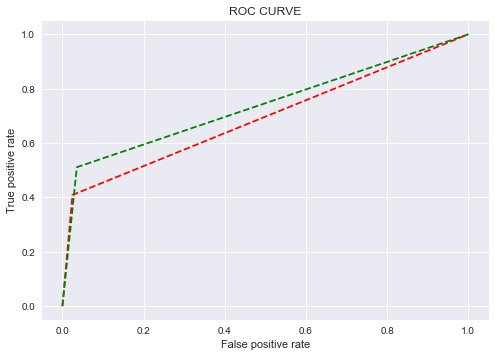

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.plot(fp,tp,linestyle='--',color='red',label='Logestic')
plt.plot(fp1,tp1,linestyle='--',color='green',label='Forest')
plt.title("ROC CURVE")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()